In [1]:
from ggplot import *
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("./baseball-pitches-clean.csv")
df = df[['pitch_time', 'inning', 'pitcher_name', 'hitter_name', 'pitch_type', 
         'px', 'pz', 'pitch_name', 'start_speed', 'end_speed', 'type_confidence']]
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.545,3.069,Fastball,93.4,85.6,0.895
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.120,1.826,Slider,89.1,82.8,0.931
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,-0.229,1.667,Slider,90.0,83.3,0.926
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,-1.917,0.438,Slider,87.7,81.6,0.915


# Question: How does fatigue affect pitch_speed?¶

In [5]:
df['game_date'] = df.pitch_time.str.slice(0, 10)
df['pitch_count'] = 1
df['pitch_count'] = df.groupby(["pitcher_name", "game_date"]).pitch_count.cumsum()

In [6]:
df[["pitcher_name", "game_date", "pitch_count"]].head()

,pitcher_name,game_date,pitch_count
0,Francisco Liriano,2013-10-01,1
1,Francisco Liriano,2013-10-01,2
2,Francisco Liriano,2013-10-01,3
3,Francisco Liriano,2013-10-01,4
4,Francisco Liriano,2013-10-01,5


In [7]:
df[["pitcher_name", "game_date", "pitch_count"]].tail()


,pitcher_name,game_date,pitch_count
17162,Brett Anderson,2013-09-25,4
17163,Brett Anderson,2013-09-25,5
17164,Brett Anderson,2013-09-25,6
17165,Brett Anderson,2013-09-25,7
17166,Brett Anderson,2013-09-25,8


# Plot puke¶

(plotting "big data" is no bueno)


C:\Users\seeth_000\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


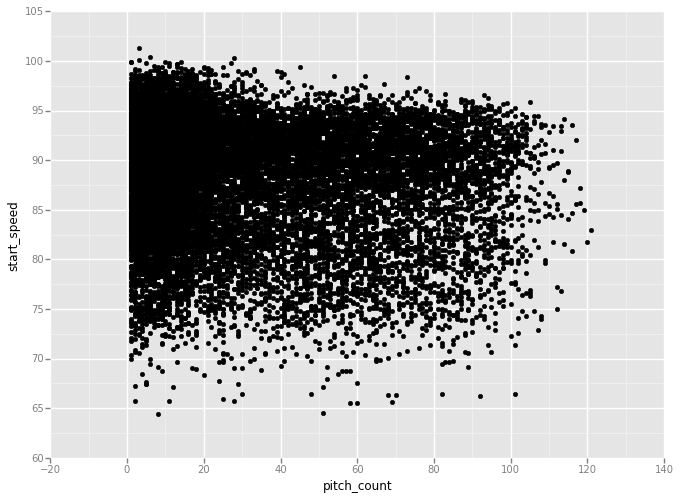

<ggplot: (34447876)>

In [8]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    geom_point()


# What if we could aggregate the data somehow?¶
In steps stat_smooth. stat_smooth provides some built in smoothing functionality


C:\Users\seeth_000\Anaconda2\lib\site-packages\ggplot\stats\stat_smooth.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data = data.sort(['x'])


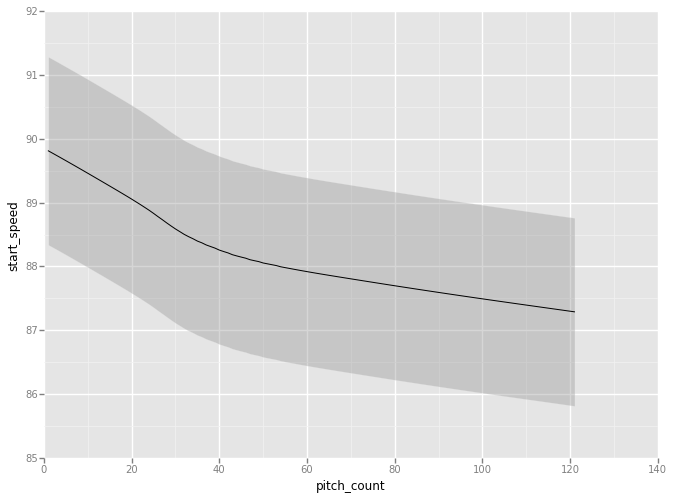

<ggplot: (36088541)>

In [9]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    stat_smooth()

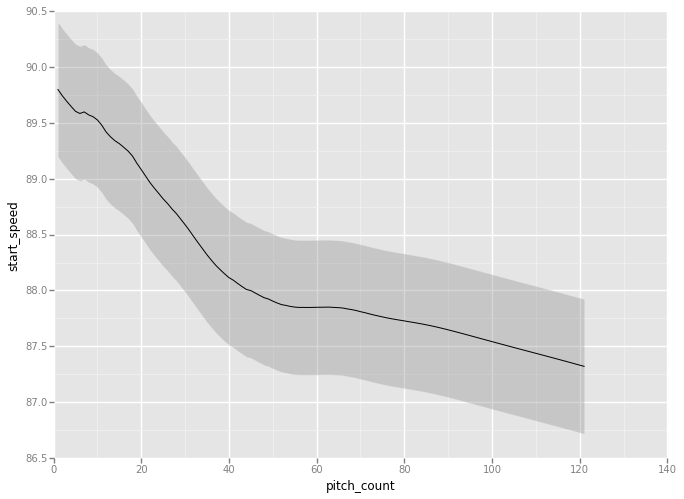

<ggplot: (36318622)>

In [10]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    stat_smooth(span=0.3)

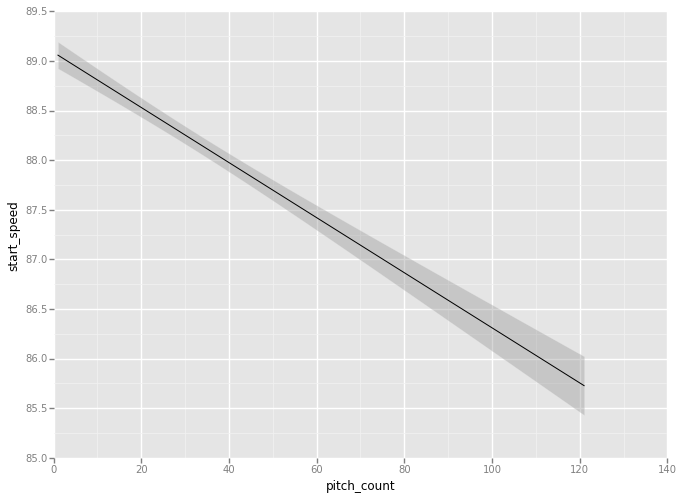

<ggplot: (36497258)>

In [11]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    stat_smooth(method='lm')

In [12]:
# How does the type of pitch affect this?¶

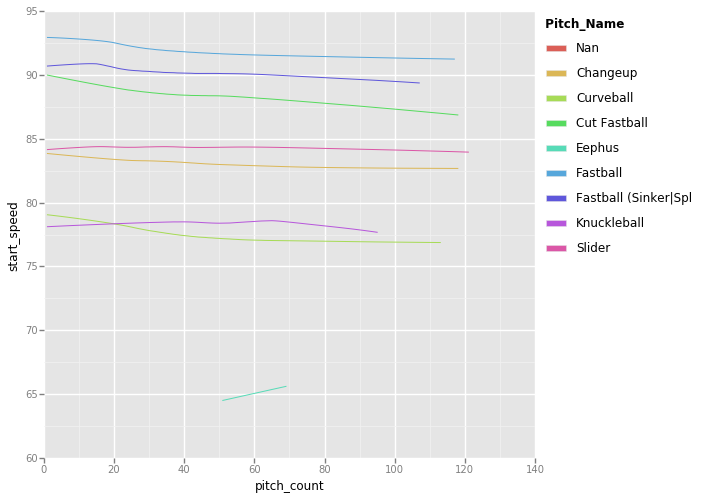

<ggplot: (36289519)>

In [13]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=df) +\
    stat_smooth(se=False)

# What if we focus on an individual?¶


In [14]:
df.pitcher_name.value_counts().head(10)

Francisco Liriano    194
C.J. Wilson          121
David Price          118
Andy Pettitte        116
Clay Buchholz        113
J.A. Happ            113
Cliff Lee            111
Mat Latos            109
Aaron Harang         107
Dan Haren            107
Name: pitcher_name, dtype: int64

In [15]:

pitcher = df[df.pitcher_name=="David Price"]
pitches = (pitcher.pitch_name.value_counts() > 10)
pitcher = pitcher[pitcher.pitch_name.isin(pitches[pitches].index)]
pitcher.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence,game_date,pitch_count
284,2013-09-30 20:21:12 -0400,1,David Price,Ian Kinsler,B,0.152,3.831,Fastball,93.2,85.9,0.926,2013-09-30,1
285,2013-09-30 20:21:26 -0400,1,David Price,Ian Kinsler,S,0.618,1.273,Changeup,83.8,78.0,2.000,2013-09-30,2
286,2013-09-30 20:21:51 -0400,1,David Price,Ian Kinsler,S,0.703,2.899,Fastball,93.7,87.1,2.000,2013-09-30,3
287,2013-09-30 20:22:15 -0400,1,David Price,Ian Kinsler,B,-2.156,1.739,Fastball,94.9,87.5,0.941,2013-09-30,4
288,2013-09-30 20:22:30 -0400,1,David Price,Ian Kinsler,B,-1.953,1.949,Fastball,94.2,86.2,2.000,2013-09-30,5


# Subsetting by inning


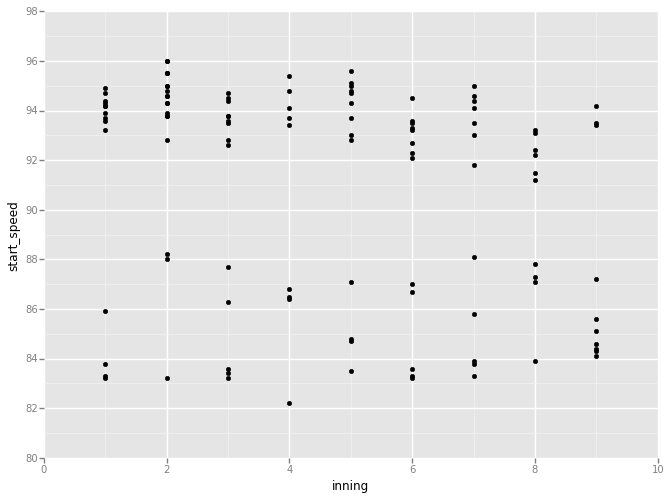

<ggplot: (34746007)>

In [18]:
ggplot(aes(x='inning', y='start_speed'), data=pitcher) +\
    geom_jitter()

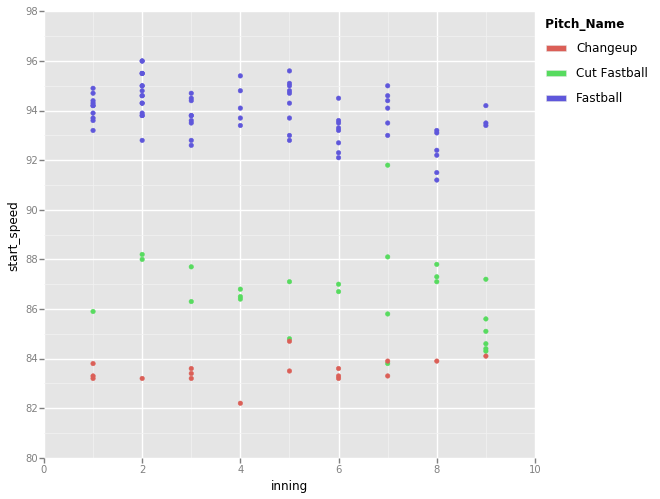

<ggplot: (34741543)>

In [19]:
ggplot(aes(x='inning', y='start_speed', color='pitch_name'), data=pitcher) +\
    geom_jitter()

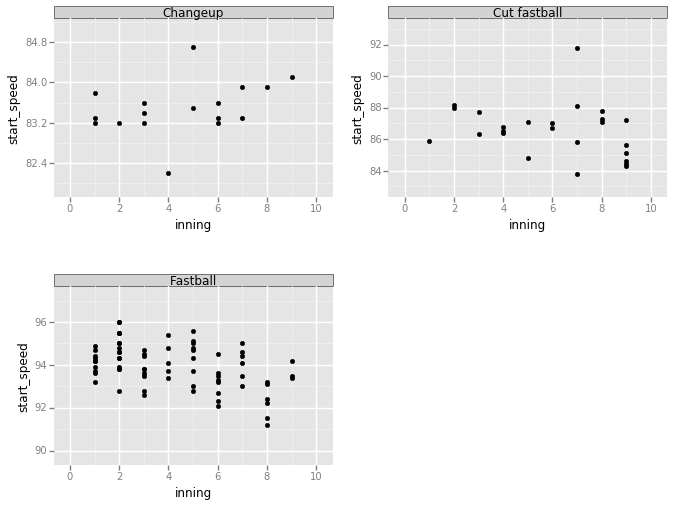

<ggplot: (47576436)>

In [20]:
ggplot(aes(x='inning', y='start_speed'), data=pitcher) +\
    geom_jitter() +\
    facet_wrap("pitch_name")

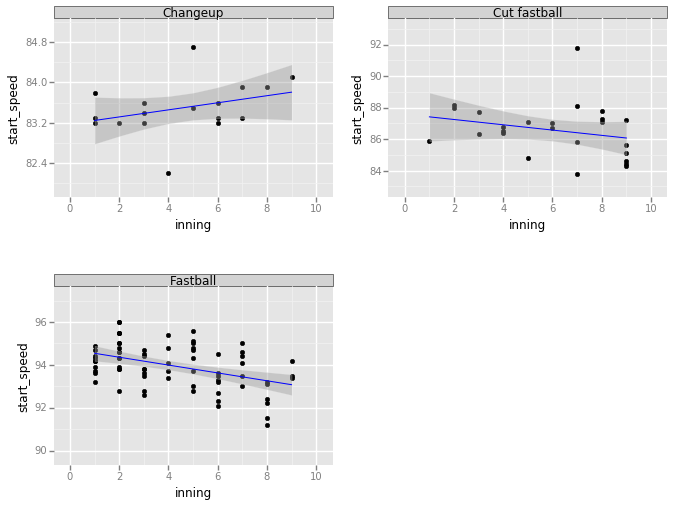

<ggplot: (47795186)>

In [21]:
ggplot(aes(x='inning', y='start_speed'), data=pitcher) +\
    geom_jitter() +\
    stat_smooth(method='lm', color='blue') +\
    facet_wrap("pitch_name")

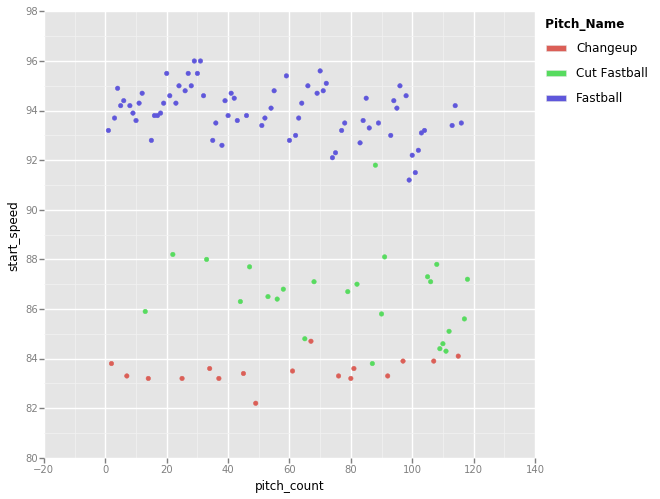

<ggplot: (48696825)>

In [22]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=pitcher) +\
    geom_jitter()


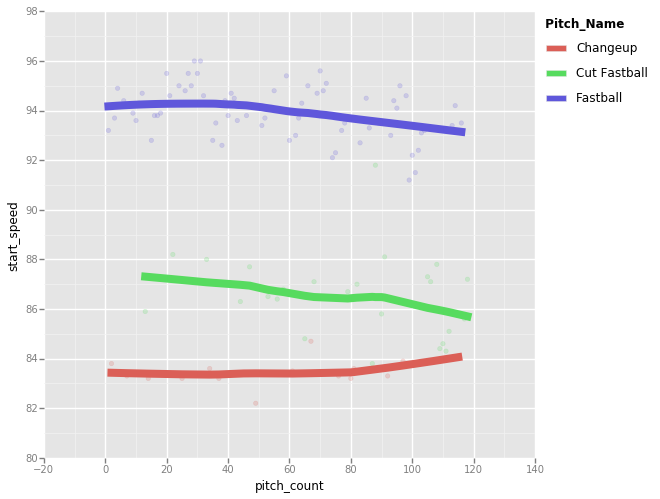

<ggplot: (48417126)>

In [23]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=pitcher) +\
    stat_smooth(se=False, size=8) + \
    geom_point(alpha=0.2)

# Justin Verlander

In [24]:
pitcher = df[df.pitcher_name=="Justin Verlander"]
pitches = (pitcher.pitch_name.value_counts() > 10)
pitcher = pitcher[pitcher.pitch_name.isin(pitches[pitches].index)]
pitcher.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence,game_date,pitch_count
871,2013-09-29 13:16:29 -0400,1,Justin Verlander,Juan Pierre,B,-1.422,2.909,Fastball,91.8,83.5,2,2013-09-29,1
872,2013-09-29 13:16:43 -0400,1,Justin Verlander,Juan Pierre,S,-0.868,2.379,Fastball,91.0,83.1,2,2013-09-29,2
873,2013-09-29 13:17:06 -0400,1,Justin Verlander,Juan Pierre,X,0.033,1.891,Fastball,91.5,82.8,2,2013-09-29,3
874,2013-09-29 13:17:51 -0400,1,Justin Verlander,Ed Lucas,S,0.670,3.067,Fastball,91.0,82.9,2,2013-09-29,4
875,2013-09-29 13:18:06 -0400,1,Justin Verlander,Ed Lucas,S,0.702,1.819,Fastball,90.6,82.9,2,2013-09-29,5


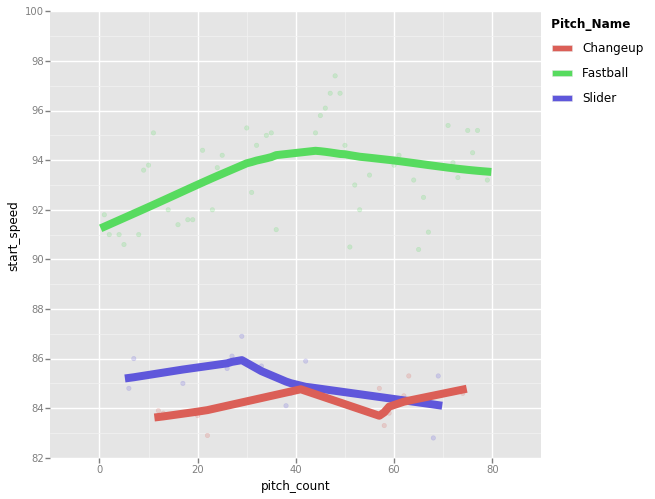

<ggplot: (48336802)>

In [25]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=pitcher) +\
    stat_smooth(se=False, size=8) + \
    geom_point(alpha=0.2)
# he actually throws harder as the game goes on!